In [10]:
from copy import deepcopy

In [18]:
# exmaple 1
original_tubes = [
          ['p','b','r','p'],
          ['y','g','g','r'],
          ['p','y','y','r'],
          ['b','g','r','p'],
          ['b','b','y','g'],
          ['0']*4,  ['0']*4
]

In [17]:
# exmaple 2
original_tubes = [
          ['y','g','g','r'],
          ['p','b','r','p'],
          ['0']*4,  ['0']*4,
          ['p','y','y','r'],
          ['b','g','r','p'],
          ['b','b','y','g'],
]

In [5]:
# exmaple 3
original_tubes = [
          ['lb','y','o','lg'],
          ['lb','g','y','dg'],
          ['p','lg','r','db'],
          ['y','lb','r','dp'],
          ['dg','lp','db','y'],
          ['b','dg','b','g'],
          ['b','db','p','r'], # one row
          ['p','lp','db','b'],
          ['dp','lp','lg','dp'],
          ['dg','dp','p','r'],
          ['o','lg','g','lb'],
          ['lp','o','g','o'],
          ['0']*4, ['0']*4
]

In [12]:
def nonEmptyIndex(tube):
  i=0
  while i in range(len(tube)):
    if tube[i] != '0':
      break
    i+=1
  return i

In [13]:
def transfer(tube1,tube2):

  # check if colr matches
  t1_indx = nonEmptyIndex(tube1)
  t2_indx = nonEmptyIndex(tube2)
  if t2_indx < len(tube2):  # if tube not empty
    if tube1[t1_indx] != tube2[t2_indx]:  # check if color matches
      return None, None
  else:   # if tube empty
    if allSame([tube1]):  # if all same
      return None, None

  # calc chunk size  
  colr = tube1[t1_indx]
  j = t1_indx + 1
  while j in range(len(tube1)):
    if tube1[j] != colr:
      break
    j+=1
  chunk_size = j - t1_indx
  
  if chunk_size <= nonEmptyIndex(tube2):  # check if tube2 can hold chunk
    for k in range(chunk_size):
      #print(tube2[j-k-1])
      tube2[t2_indx - k - 1] = tube1[t1_indx + k]
      tube1[t1_indx + k] = '0'
  else:
    return None, None

  return tube1,tube2

In [14]:
def allSame(tubes):
  same = True
  colrs = []
  for tube in tubes:
    t_indx = nonEmptyIndex(tube)
    if t_indx == len(tube):  # all same if tube empty
      continue

    colr1 = tube[t_indx]
    colrs.append(colr1)
    t_indx += 1
    while t_indx in range(len(tube)):
      if tube[t_indx] != colr1:
        return False
      t_indx += 1

  if len(colrs) > len(set(colrs)):
    return False
  return same

### sequential backtracking

In [5]:
def seq_backtrack(original_tubes):
  tubes = deepcopy(original_tubes)
  solved = False
  tubes_state = []

  i=0;  j=1; run=0; max_moves=0
  while True:
    if allSame(tubes):
      solved = True
      break
    transferred = False
    tubes_state.append([tubes])

    # transfer from tube1 to tube2
    while i in range(len(tubes)):
      while j in range(i+1,len(tubes)):
        tube1, tube2 = tubes[i], tubes[j]
        cond_1 = nonEmptyIndex(tube1) < len(tube1)  # tube1 should not be empty
        cond_2 = nonEmptyIndex(tube2) > 0   # tube2 should not be full
        if cond_1 and cond_2:
          new_tubes = deepcopy(tubes)
          new_tube1, new_tube2 = transfer(tube1.copy(),tube2.copy())
          if new_tube1 is not None:          
            new_tubes[i], new_tubes[j] = new_tube1, new_tube2           
            #print("move:%d -> transfer tube%d to tube%d"%(move_indx,i+1,j+1))
            move = (i,j,False)
            #print(new_tubes)
            transferred = True
            tubes = new_tubes
            break
        if not transferred:
          tube1, tube2 = tubes[j], tubes[i]
          cond_1 = nonEmptyIndex(tube1) < len(tube1)  # tube1 should not be empty
          cond_2 = nonEmptyIndex(tube2) > 0   # tube2 should not be full
          if cond_1 and cond_2:
            new_tubes = deepcopy(tubes)
            new_tube1, new_tube2 = transfer(tube1.copy(),tube2.copy())
            if new_tube1 is not None:          
              new_tubes[j], new_tubes[i] = new_tube1, new_tube2           
              #print("move:%d -> transfer tube%d to tube%d"%(move_indx,j+1,i+1))
              move = (i,j,True)
              #print(new_tubes)
              transferred = True
              tubes = new_tubes
              break
        j += 1        
      if transferred:
        break
      i+=1; j=i+1
    if not transferred:   # stuck having checked all possibilities
      tubes, i, j, _ = tubes_state[-2]    # get the 2nd last state and its moves

      j += 1 
      if j == len(tubes):
        i += 1
        j = i+1
        if i == len(tubes):
          break
      del tubes_state[-2]   # delete the 2nd last state as its moves should be updated
      del tubes_state[-1]   # delete the last state as no moves possible from there
    else:
      i=0; j=1
      tubes_state[-1].extend(move)

    if len(tubes_state) > max_moves:
      max_moves = len(tubes_state)
    if run%1000==0:
      print("run %d, max_moves = %d"%(run,max_moves))
    run += 1  
      
  if solved:
    moves = []
    for _, i,j,swap in tubes_state:
      if swap:
        moves.append((j,i))
      else:
        moves.append((i,j))
    return moves
  else:
    return None

def printMoves(moves):
  if moves is not None:
    for k,(i,j) in enumerate(moves):
      print("move:%d -> transfer tube%d to tube%d"%(k+1,i+1,j+1))
  else:
    print("failed")

### sequential incremental

In [6]:
def seq_increment(original_tubes):  
  tubes = deepcopy(original_tubes)
  solved = False
  move_indx = 0
  moves = []

  for k in range(1000):
    if allSame(tubes):
      solved = True
      break
    transferred = False

    # transfer from tube1 to tube2
    for i in range(len(tubes)):
      for j in range(i+1,len(tubes)):
        tube1, tube2 = tubes[i], tubes[j]
        cond_1 = nonEmptyIndex(tube1) < len(tube1)  # tube1 should not be empty
        cond_2 = nonEmptyIndex(tube2) > 0   # tube2 should not be full
        if cond_1 and cond_2:
          new_tubes = deepcopy(tubes)
          new_tube1, new_tube2 = transfer(tube1.copy(),tube2.copy())
          if new_tube1 is not None:          
            new_tubes[i], new_tubes[j] = new_tube1, new_tube2           
            #print("move:%d -> transfer tube%d to tube%d"%(move_indx,i+1,j+1))
            moves.append((i,j))
            #print(new_tubes)
            transferred = True
            tubes = new_tubes
            break
        if not transferred:
          tube1, tube2 = tubes[j], tubes[i]
          cond_1 = nonEmptyIndex(tube1) < len(tube1)  # tube1 should not be empty
          cond_2 = nonEmptyIndex(tube2) > 0   # tube2 should not be full
          if cond_1 and cond_2:
            new_tubes = deepcopy(tubes)
            new_tube1, new_tube2 = transfer(tube1.copy(),tube2.copy())
            if new_tube1 is not None:          
              new_tubes[j], new_tubes[i] = new_tube1, new_tube2           
              #print("move:%d -> transfer tube%d to tube%d"%(move_indx,j+1,i+1))
              moves.append((j,i))
              #print(new_tubes)
              transferred = True
              tubes = new_tubes
              break
      if transferred:
        break
    if not transferred:
      break
      
  if solved:
    return moves
  else:
    return None

### random search

In [7]:
import numpy as np
from tqdm.notebook import tqdm

In [8]:
def random_search(original_tubes, n_runs=1000, check_all=False):
  run_moves = []

  for run in tqdm(range(n_runs)):
    tubes = deepcopy(original_tubes)
    moves_tested = []
    moves = []
    solved = False
    
    move_indx = 1
    
    while True:
      if allSame(tubes):
        #print("run %d : done"%(run))
        solved = True
        break
      # transfer from tube1 to tube2
      if len(moves_tested) == np.math.factorial(len(tubes))/(2*np.math.factorial(len(tubes)-2)):
        break
      while True:
        i,j = np.random.choice(range(len(tubes)),2,replace=False)
        if (i,j) not in moves_tested and (j,i) not in moves_tested:
          moves_tested.append((i,j))
          break

      transferred = False
      tube1, tube2 = tubes[i], tubes[j]
      cond_1 = nonEmptyIndex(tube1) < len(tube1)  # tube1 should not be empty
      cond_2 = nonEmptyIndex(tube2) > 0   # tube2 should not be full
      if cond_1 and cond_2:
        new_tubes = deepcopy(tubes)
        new_tube1, new_tube2 = transfer(tube1.copy(),tube2.copy())
        if new_tube1 is not None:          
          new_tubes[i], new_tubes[j] = new_tube1, new_tube2
          #print("move:%d -> transfer tube%d to tube%d"%(move_indx,i+1,j+1))
          moves.append((i,j))
          move_indx += 1
          #print(new_tubes)
          transferred = True
          tubes = new_tubes
      if not transferred:
        tube1, tube2 = tubes[j], tubes[i]
        cond_1 = nonEmptyIndex(tube1) < len(tube1)  # tube1 should not be empty
        cond_2 = nonEmptyIndex(tube2) > 0   # tube2 should not be full
        if cond_1 and cond_2:
          new_tubes = deepcopy(tubes)
          new_tube1, new_tube2 = transfer(tube1.copy(),tube2.copy())
          if new_tube1 is not None:          
            new_tubes[j], new_tubes[i] = new_tube1, new_tube2           
            #print("move:%d -> transfer tube%d to tube%d"%(move_indx,j+1,i+1))
            moves.append((j,i))
            move_indx += 1
            #print(new_tubes)
            transferred = True
            tubes = new_tubes 
      if transferred:
        moves_tested = []
    if not solved:
      #print("run %d : failed"%(run))
      continue
    run_moves.append(moves)
    if not check_all:
      print("found a solution in run %d"%(run));
      break
  if check_all:
    print("all runs completed\n")  

  if len(run_moves) > 0:
    move_lens = [len(moves) for moves in run_moves]
    min_run = move_lens.index(min(move_lens))
    best_moves = run_moves[min_run]
    return best_moves
  else:
    return None

In [15]:
moves = seq_backtrack(original_tubes)  
printMoves(moves)

run 0, max_moves = 1
move:1 -> transfer tube1 to tube3
move:2 -> transfer tube2 to tube4
move:3 -> transfer tube6 to tube2
move:4 -> transfer tube6 to tube1
move:5 -> transfer tube5 to tube4
move:6 -> transfer tube3 to tube5
move:7 -> transfer tube1 to tube3
move:8 -> transfer tube1 to tube6
move:9 -> transfer tube2 to tube1
move:10 -> transfer tube7 to tube1
move:11 -> transfer tube2 to tube6
move:12 -> transfer tube2 to tube4
move:13 -> transfer tube5 to tube2
move:14 -> transfer tube7 to tube2
move:15 -> transfer tube3 to tube7
move:16 -> transfer tube6 to tube3
move:17 -> transfer tube3 to tube5
move:18 -> transfer tube4 to tube6


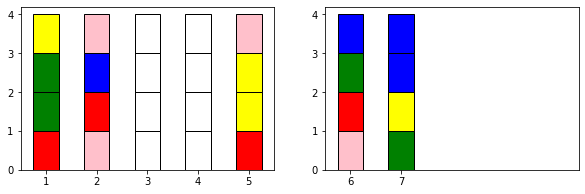

move:1 -> transfer tube1 to tube3


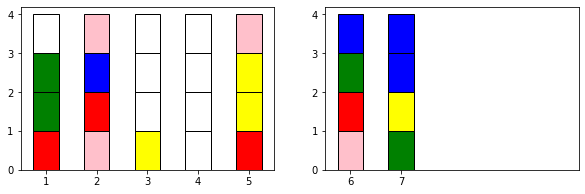

move:2 -> transfer tube2 to tube4


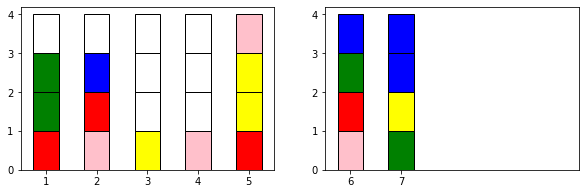

move:3 -> transfer tube6 to tube2


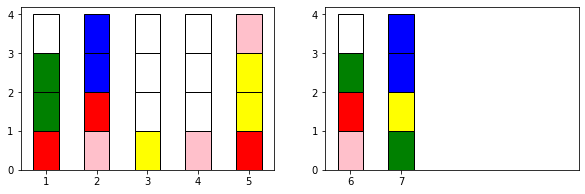

move:4 -> transfer tube6 to tube1


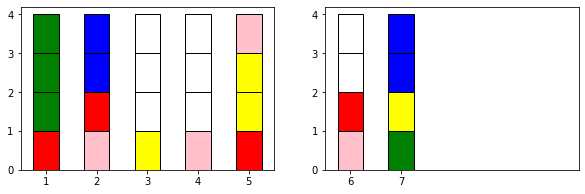

move:5 -> transfer tube5 to tube4


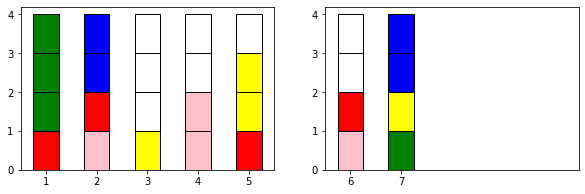

move:6 -> transfer tube3 to tube5


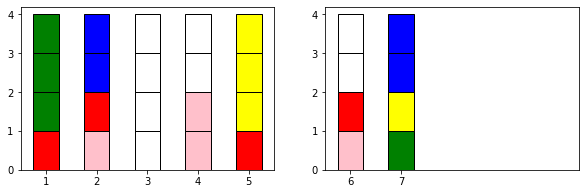

move:7 -> transfer tube1 to tube3


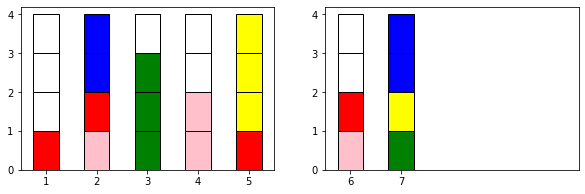

move:8 -> transfer tube1 to tube6


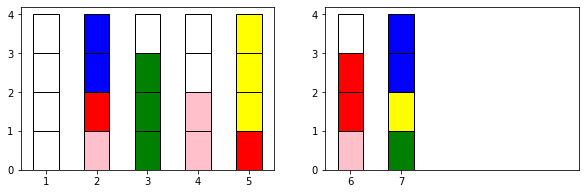

move:9 -> transfer tube2 to tube1


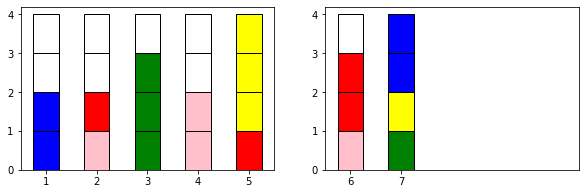

move:10 -> transfer tube7 to tube1


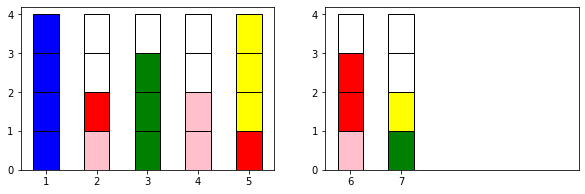

move:11 -> transfer tube2 to tube6


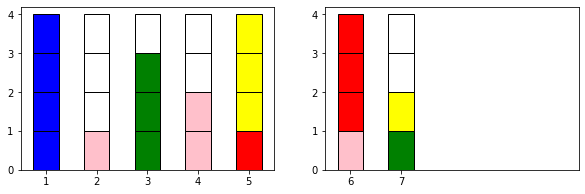

move:12 -> transfer tube2 to tube4


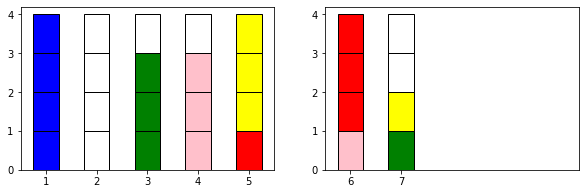

move:13 -> transfer tube5 to tube2


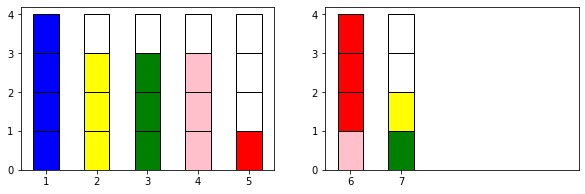

move:14 -> transfer tube7 to tube2


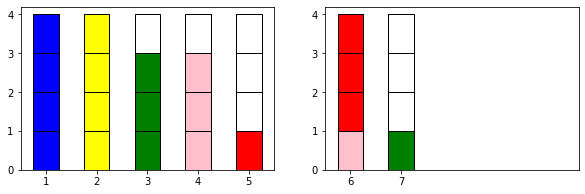

move:15 -> transfer tube3 to tube7


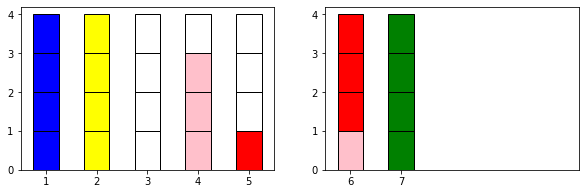

move:16 -> transfer tube6 to tube3


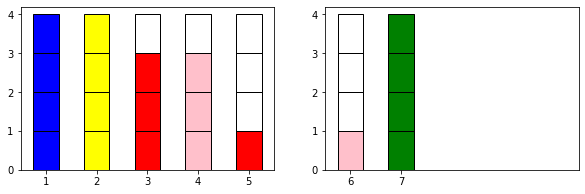

move:17 -> transfer tube3 to tube5


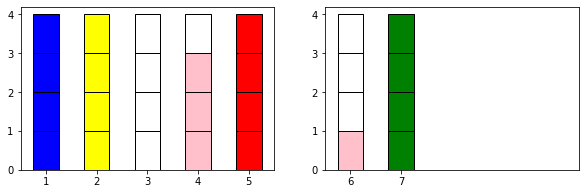

move:18 -> transfer tube4 to tube6


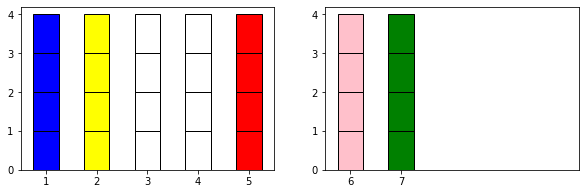

In [18]:
from ColorSort import playGame, replaceColors

colrs = {'p':"pink", 'b':"blue", 'r':"red", 'y':"yellow", 'g':"green"}
tubes = replaceColors(original_tubes, colrs)
playGame(tubes, moves)